In [1]:
library(ggplot2)

In [2]:
mydir = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/neuroseq/"
list.files(mydir)

[1] "?"                                                   
 [2] "bayNorm_2D_posterior_estimates_FPP_D11.qcPassing.RDS"
 [3] "bayNorm_2D_posterior_estimates_FPP_D11.RData"        
 [4] "concatSingleCell_FPP_transp.npy"                     
 [5] "concatSingleCell_FPP.tsv"                            
 [6] "concatSingleCell_genefilt_FPP.hdf5"                  
 [7] "concatSingleCell_genefilt_FPP.tsv"                   
 [8] "concatSingleCell_genefilt_NB.hdf5"                   
 [9] "concatSingleCell_genefilt_P_FPP.hdf5"                
[10] "concatSingleCell_genefilt_P_FPP.tsv"                 
[11] "concatSingleCell_NB.tsv"                             
[12] "concatSingleCell_P_FPP.tsv"                          
[13] "concatSingleCell.tsv"                                
[14] "neuroseq_cell_notpassing_filter.txt"                 
[15] "neuroseq_cell_passing_filter_mj.txt"                 
[16] "neuroseq_cell_passing_filter.txt"                    
[17] "relRows.txt"                                         
[18] "sctransform_FPP_D11.RData"                           
[19] "splitMatrix"

In [3]:
df0 = read.csv(paste0(mydir, "concatSingleCell_FPP.tsv"), sep="\t")
nrow(df0)
ncol(df0)

[1] 32738

[1] 136075

In [4]:
df0[1:5,1:5]

gene_ids.1,AAACCTGAGGAATGGA.1.0,AAACCTGGTAGGCATG.1.0,AAACCTGGTCGAGATG.1.0,AAACCTGGTGCGGTAA.1.0
ENSG00000243485,0,0,0,0
ENSG00000237613,0,0,0,0
ENSG00000186092,0,0,0,0
ENSG00000238009,0,0,0,0
ENSG00000239945,0,0,0,0


In [6]:
all_cells = gsub("\\.","-",colnames(df0))

In [7]:
### only select QC-passing cells
qc_cell_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/neuroseq_cell_passing_filter.txt"
qc_df = as.data.frame(read.table(qc_cell_filename))
colnames(qc_df) = 'index'
nrow(qc_df)
head(qc_df,2)

[1] 132983

index
AAACCTGAGGAATGGA-1-0
AAACCTGGTAGGCATG-1-0


In [8]:
qc_cells = as.character(qc_df$index)

In [9]:
length(all_cells)
length(qc_cells)
head(all_cells)
head(qc_cells)

[1] 136075

[1] 132983

[1] "gene_ids-1"           "AAACCTGAGGAATGGA-1-0" "AAACCTGGTAGGCATG-1-0"
[4] "AAACCTGGTCGAGATG-1-0" "AAACCTGGTGCGGTAA-1-0" "AAACCTGTCGCAGGCT-1-0"

[1] "AAACCTGAGGAATGGA-1-0" "AAACCTGGTAGGCATG-1-0" "AAACCTGGTCGAGATG-1-0"
[4] "AAACCTGGTGCGGTAA-1-0" "AAACCTGTCGCAGGCT-1-0" "AAACGGGAGAGTAATC-1-0"

In [ ]:
df = data.frame(cell = all_cells)
df$total_counts = colSums(df0)
df$total_genes = colSums(df0>0)
df$QC = df$cell %in% qc_cells
head(df)

In [ ]:
write.csv(df, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/neuro_summarised_counts.csv")

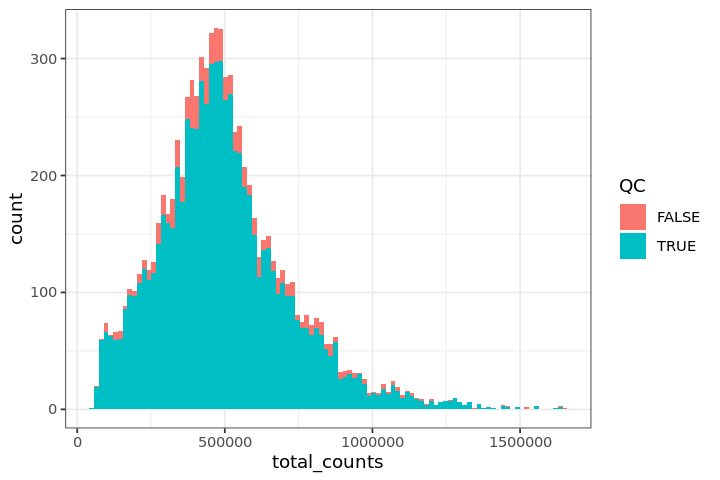

In [11]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(df, aes(x=total_counts, fill=QC)) + geom_histogram(bins = 100) + theme_bw()

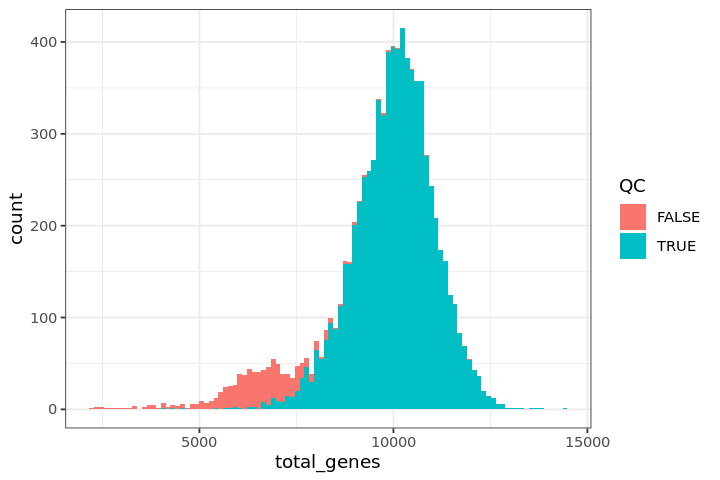

In [12]:
ggplot(df, aes(x=total_genes, fill=QC)) + geom_histogram(bins = 100) + theme_bw()

In [13]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/figures/"

In [14]:
pdf(paste0(fig_dir,"cellQC_total_genes.pdf"), width=6, height=4)
ggplot(df, aes(x=total_genes, fill=QC)) + geom_histogram(bins = 100) + theme_bw()
dev.off()

png 
  2

In [15]:
n_genes = nrow(df0)
n = ceiling(0.01*n_genes)
genes_expr = rowSums(df0)
ordered_ge = genes_expr[order(genes_expr, decreasing=T)]
top1_expressed_genes = names(ordered_ge[1:100])
length(top1_expressed_genes)
head(top1_expressed_genes)

[1] 100

[1] "ENSG00000272060" "ENSG00000075624" "ENSG00000156508" "ENSG00000111640"
[5] "ENSG00000096384" "ENSG00000184009"

In [16]:
df$counts_from_top1 = colSums(df0[top1_expressed_genes,])
df$pct_from_top1 = 100*df$counts_from_top1/df$total_counts
head(df,2)

cell,total_counts,total_genes,QC,counts_from_top1,pct_from_top1
25476_4#168,496349,10179,TRUE,122739,24.72837
25476_7#265,390265,10228,TRUE,98333,25.19647


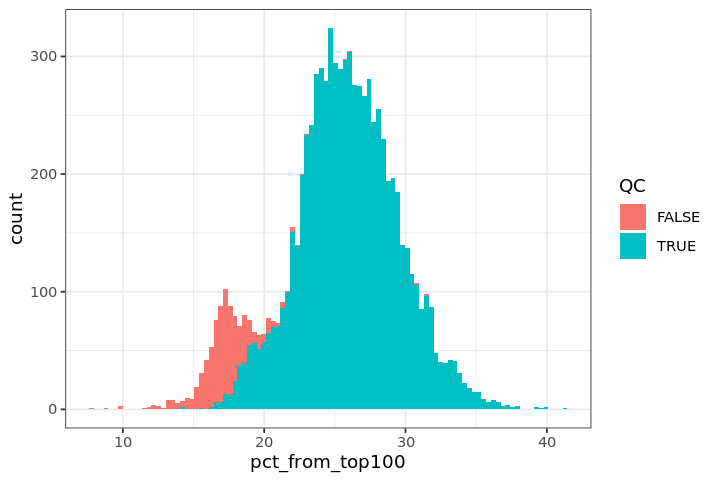

In [17]:
ggplot(df, aes(x=pct_from_top1, fill=QC)) + geom_histogram(bins = 100) + theme_bw() + xlab("pct_from_top100")

In [ ]:
pdf(paste0(fig_dir,"cellQC_counts_from_top100genes.pdf"), width=6, height=4)
ggplot(df, aes(x=total_genes, fill=QC)) + geom_histogram(bins = 100) + theme_bw()
dev.off()

In [11]:
ensembl_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/Ensemble_75_Gene_Structures_Exon_Info.txt"
ensembl_df = read.csv(ensembl_filename, sep = "\t")
head(ensembl_df)

Ensembl.Gene.ID,Ensembl.Transcript.ID,Ensembl.Protein.ID,Chromosome.Name,Gene.Start..bp.,Gene.End..bp.,Strand,Transcript.Start..bp.,Transcript.End..bp.,X5..UTR.Start,X5..UTR.End,X3..UTR.Start,X3..UTR.End,Exon.Chr.Start..bp.,Exon.Chr.End..bp.,Constitutive.Exon,Exon.Rank.in.Transcript,Ensembl.Exon.ID
ENSG00000261657,ENST00000566782,ENSP00000456546,HG991_PATCH,66119285,66465398,1,66119285,66456619,66119285,66119659,NA,NA,66119285,66119659,0,1,ENSE00002619671
ENSG00000261657,ENST00000566782,ENSP00000456546,HG991_PATCH,66119285,66465398,1,66119285,66456619,66298434,66298786,NA,NA,66298434,66298819,0,2,ENSE00002619173
ENSG00000261657,ENST00000566782,ENSP00000456546,HG991_PATCH,66119285,66465398,1,66119285,66456619,NA,NA,NA,NA,66314236,66314392,0,3,ENSE00002608999
ENSG00000261657,ENST00000566782,ENSP00000456546,HG991_PATCH,66119285,66465398,1,66119285,66456619,NA,NA,NA,NA,66320895,66321004,0,4,ENSE00002582087
ENSG00000261657,ENST00000566782,ENSP00000456546,HG991_PATCH,66119285,66465398,1,66119285,66456619,NA,NA,NA,NA,66339743,66339847,0,5,ENSE00003659997
ENSG00000261657,ENST00000566782,ENSP00000456546,HG991_PATCH,66119285,66465398,1,66119285,66456619,NA,NA,NA,NA,66341024,66341071,0,6,ENSE00003643112


In [12]:
unique(ensembl_df$Chromosome.Name)

[1] HG991_PATCH              13                       HG706_PATCH             
  [4] HG185_PATCH              21                       15                      
  [7] 18                       HG183_PATCH              HSCHR19LRC_COX2_CTG1    
 [10] HG998_1_PATCH            20                       HG186_PATCH             
 [13] HG243_PATCH              GL000231.1               9                       
 [16] HG858_PATCH              HSCHR20_1_CTG1           HSCHR6_MHC_MANN         
 [19] HSCHR6_MHC_SSTO          22                       HG686_PATCH             
 [22] HG962_PATCH              HG325_PATCH              HG989_PATCH             
 [25] HG1063_PATCH             GL000195.1               HSCHR19_1_CTG3_1        
 [28] HSCHR6_MHC_MCF           HG19_PATCH               GL000199.1              
 [31] HSCHR6_1_CTG5            HG748_PATCH              HSCHR7_1_CTG6           
 [34] HSCHR12_1_CTG5           GL000211.1               HSCHR19LRC_COX1_CTG1    
 [37] HG14_PATCH               8                        HSCHR4_1_CTG12          
 [40] X                        HG873_PATCH              HG271_PATCH             
 [43] 4                        GL000229.1               GL000194.1              
 [46] GL000213.1               HSCHR12_1_CTG2_1         HSCHR4_2_CTG9           
 [49] HG142_HG150_NOVEL_TEST   HSCHR17_6_CTG4           HSCHR1_3_CTG31          
 [52] 7                        HSCHR6_MHC_QBL           GL000191.1              
 [55] 3                        14                       HG996_PATCH             
 [58] HG311_PATCH              GL000224.1               17                      
 [61] HG1308_PATCH             HG747_PATCH              12                      
 [64] HSCHR15_1_CTG8           2                        10                      
 [67] HSCHR6_MHC_COX           6                        Y                       
 [70] 5                        HSCHR6_MHC_DBB           19                      
 [73] 16                       11                       HSCHR1_1_CTG31          
 [76] 1                        MT                       HSCHR19LRC_PGF2_CTG1    
 [79] HSCHR3_1_CTG2_1          HG544_PATCH              HG104_HG975_PATCH       
 [82] HSCHR19LRC_LRC_T_CTG1    GL000201.1               HSCHR12_2_CTG2_1        
 [85] GL000215.1               HSCHR18_2_CTG2           HG999_1_PATCH           
 [88] HG1091_PATCH             HSCHR12_3_CTG2_1         HG729_PATCH             
 [91] HSCHR21_3_CTG1_1         HG339_PATCH              HSCHR2_1_CTG1           
 [94] HSCHR19LRC_LRC_J_CTG1    HG990_PATCH              HG536_PATCH             
 [97] HSCHR1_2_CTG31           HSCHR4_1                 HSCHR19LRC_PGF1_CTG1    
[100] HG871_PATCH              GL000204.1               HSCHR16_2_CTG3_1        
[103] GL000192.1               HSCHR6_MHC_APD           HG79_PATCH              
[106] HSCHR19_2_CTG3           HSCHR4_1_CTG6            GL000240.1              
[109] GL000220.1               HG7_PATCH                HSCHR5_1_CTG5           
[112] HSCHR22_1_CTG2           GL000242.1               HG414_PATCH             
[115] HG1032_PATCH             GL000219.1               HG256_PATCH             
[118] GL000241.1               HSCHR12_1_CTG1           HG388_HG400_PATCH       
[121] HSCHR18_1_CTG1_1         HSCHR5_1_CTG2            HG736_PATCH             
[124] GL000223.1               HSCHR17_4_CTG4           GL000193.1              
[127] HSCHR19_1_CTG3           GL000225.1               GL000233.1              
[130] HG306_PATCH              HSCHR5_2_CTG1            HSCHR19_3_CTG3          
[133] HSCHR19LRC_LRC_S_CTG1    HG998_2_PATCH            HG531_PATCH             
[136] HG946_PATCH              HG299_PATCH              GL000247.1              
[139] HSCHR16_1_CTG3_1         HSCHR9_1_CTG1            HG999_2_PATCH           
[142] HSCHR10_1_CTG5           GL000216.1               GL000228.1              
[145] GL000236.1               HSCHR17_1                HG1293_PATCH            
[148] HSCHR5_1_CTG1            HG

In [13]:
mt_genes = as.character(ensembl_df[ensembl_df$Chromosome.Name == "MT", "Ensembl.Gene.ID"])
head(mt_genes)

[1] "ENSG00000210049" "ENSG00000211459" "ENSG00000210077" "ENSG00000210082"
[5] "ENSG00000209082" "ENSG00000198888"

In [14]:
length(mt_genes)

[1] 37

In [15]:
df$pct_MT = colSums(df0[mt_genes,])/colSums(df0)
head(df)

cell,total_counts,total_genes,QC,pct_MT
25476_4#168,496349,10179,TRUE,0
25476_7#265,390265,10228,TRUE,0
25476_7#82,791992,8440,TRUE,0
25476_7#294,515855,9936,TRUE,0
25476_4#223,487810,9560,TRUE,0
25476_4#74,373031,10080,TRUE,0


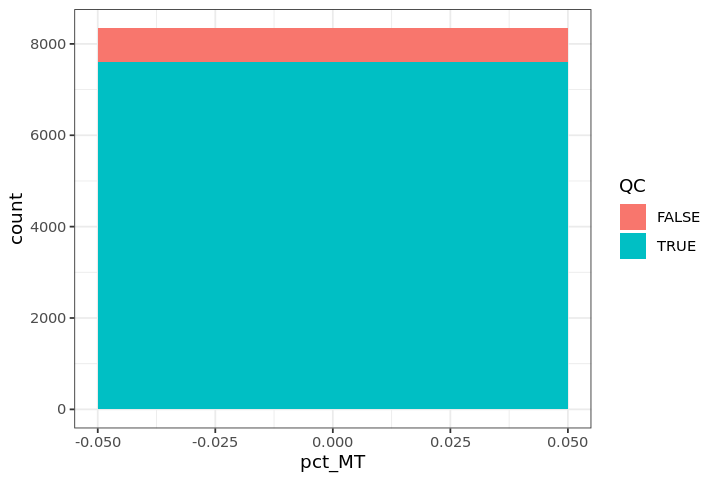

In [16]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(df, aes(x=pct_MT, fill=QC)) + geom_histogram(bins = 100) + theme_bw()

In [28]:
head(colSums(df0))

X25476_4.168 X25476_7.265  X25476_7.82 X25476_7.294 X25476_4.223  X25476_4.74 
      496349       390265       791992       515855       487810       373031

In [31]:
df0[mt_genes,1:5]

,X25476_4.168,X25476_7.265,X25476_7.82,X25476_7.294,X25476_4.223
ENSG00000210049,0,0,0,0,0
ENSG00000211459,0,0,0,0,0
ENSG00000210077,0,0,0,0,0
ENSG00000210082,0,0,0,0,0
ENSG00000209082,0,0,0,0,0
ENSG00000198888,0,0,0,0,0
ENSG00000210100,0,0,0,0,0
ENSG00000210107,0,0,0,0,0
ENSG00000210112,0,0,0,0,0
ENSG00000198763,0,0,0,0,0
